## Plotly 3D visualization of clustering stock market


The original code written by Gael Varoquaux gael.varoquaux@normalesup.org can be found in scikit-learn demo package: https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#sphx-glr-auto-examples-applications-plot-stock-market-py 

In [40]:
import numpy as np
import plotly.express as px
from sklearn import cluster, covariance, manifold
import tqdm

In [5]:
 #############################################################################
# Retrieve the data from Internet

# The data is from 2003 - 2008. This is reasonably calm: (not too long ago so
# that we get high-tech firms, and before the 2008 crash). This kind of
# historical data can be obtained for from APIs like the quandl.com and
# alphavantage.co ones.

symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'McDonald\'s',
    'PEP': 'Pepsi',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas Instruments',
    'XRX': 'Xerox',
    'WMT': 'Wal-Mart',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

symbols, names = np.array(sorted(symbol_dict.items())).T

quotes = []

for symbol in tqdm.tqdm(symbols, 'Data Loading: '):
    url = ('https://raw.githubusercontent.com/scikit-learn/examples-data/'
           'master/financial-data/{}.csv')
    quotes.append(pd.read_csv(url.format(symbol)))

Data Loading: 100%|██████████| 56/56 [00:06<00:00,  8.15it/s]


In [7]:
close_prices = np.vstack([q['close'] for q in quotes])
open_prices = np.vstack([q['open'] for q in quotes])

# The daily variations of the quotes are what carry most information
variation = close_prices - open_prices

# #############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphicalLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

# #############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

Cluster 1: Apple, Amazon, Yahoo
Cluster 2: Comcast, Cablevision, Time Warner
Cluster 3: ConocoPhillips, Chevron, Total, Valero Energy, Exxon
Cluster 4: Cisco, Dell, HP, IBM, Microsoft, SAP, Texas Instruments
Cluster 5: Boeing, General Dynamics, Northrop Grumman, Raytheon
Cluster 6: AIG, American express, Bank of America, Caterpillar, CVS, DuPont de Nemours, Ford, General Electrics, Goldman Sachs, Home Depot, JPMorgan Chase, Marriott, 3M, Ryder, Wells Fargo, Wal-Mart
Cluster 7: McDonald's
Cluster 8: GlaxoSmithKline, Novartis, Pfizer, Sanofi-Aventis, Unilever
Cluster 9: Kellogg, Coca Cola, Pepsi
Cluster 10: Colgate-Palmolive, Kimberly-Clark, Procter Gamble
Cluster 11: Canon, Honda, Navistar, Sony, Toyota, Xerox


In [22]:
labels

array([ 0,  5,  0,  5,  4,  5, 10,  5,  9,  1,  2,  3,  1,  5,  2,  5,  3,
        5,  4,  5,  5,  7,  5, 10,  3,  3,  5,  8,  9,  8,  5,  6,  5,  3,
       10,  4,  7,  8,  7,  9,  5,  4,  3, 10,  7, 10,  2,  1,  3,  7,  2,
        5,  5,  2, 10,  0])

In [21]:
names

array(['Apple', 'AIG', 'Amazon', 'American express', 'Boeing',
       'Bank of America', 'Canon', 'Caterpillar', 'Colgate-Palmolive',
       'Comcast', 'ConocoPhillips', 'Cisco', 'Cablevision', 'CVS',
       'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Dynamics',
       'General Electrics', 'Goldman Sachs', 'GlaxoSmithKline',
       'Home Depot', 'Honda', 'HP', 'IBM', 'JPMorgan Chase', 'Kellogg',
       'Kimberly-Clark', 'Coca Cola', 'Marriott', "McDonald's", '3M',
       'Microsoft', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi',
       'Pfizer', 'Procter Gamble', 'Ryder', 'Raytheon', 'SAP', 'Sony',
       'Sanofi-Aventis', 'Toyota', 'Total', 'Time Warner',
       'Texas Instruments', 'Unilever', 'Valero Energy', 'Wells Fargo',
       'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo'], dtype='<U17')

In [ ]:
# Find a low-dimension embedding for visualization
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=3, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

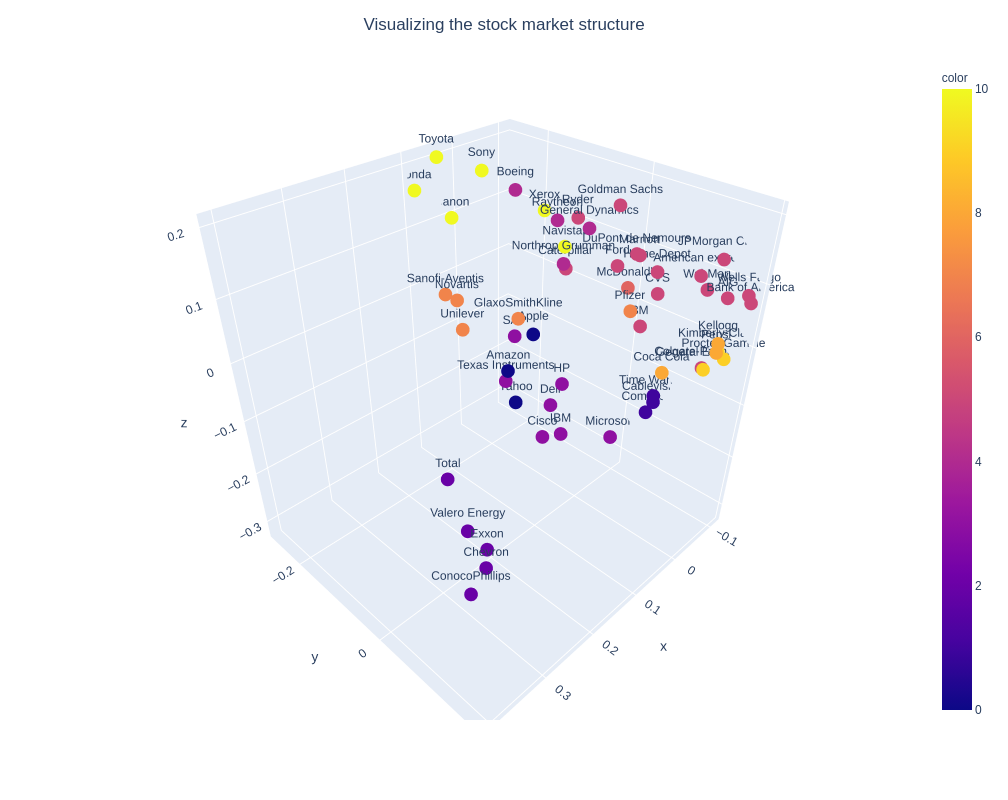

In [54]:
fig = px.scatter_3d(x=embedding[0], 
                                   y=embedding[1], 
                                   z=embedding[2],
                                   text=names,
                   color=labels,
                   )

fig.update_traces(textposition='top center')

fig.update_layout(height=800,
                  title_text='Visualizing the stock market structure',
                  title_x=0.5
)

fig.show()